In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *

In [2]:
def layer_size(X,Y):
    n_x=X.shape[0] #number of inputs
    n_y=4 #number of hidden layer nodes
    n_z=Y.shape[0] #number of output nodes
    return n_x,n_y,n_z

In [20]:
X_assess, Y_assess = layer_sizes_test_case()
print(X_assess.shape)
print(Y_assess.shape)
n_x,n_y,n_z=layer_size(X_assess,Y_assess)

(5, 3)
(2, 3)


In [4]:
print("number of input nodes: ",n_x)
print("number of hidden layer nodes: ",n_y)
print("number of output layer nodes : ",n_z)

number of input nodes:  5
number of hidden layer nodes:  4
number of output layer nodes :  2


In [5]:
from lr_utils import load_dataset

In [6]:
x_train,y_train,x_test,y_test,classes=load_dataset()
x_train_std=(x_train.reshape(x_train.shape[0],-1).T)
x_test_std=(x_test.reshape(x_test.shape[0],-1).T)

In [7]:
nx,ny,nz=layer_size(x_train_std,y_train)

In [8]:
print("nx input layer nodes: ",nx)
print("ny hidden layer nodes:",ny)
print("nz output layer nodes:",nz)

nx input layer nodes:  12288
ny hidden layer nodes: 4
nz output layer nodes: 1


In [9]:
from planar_utils import load_planar_dataset

In [10]:
X,Y=load_planar_dataset()

In [11]:
nx,ny,nz=layer_size(X,Y)
print("nx input layer nodes: ",nx)
print("ny hidden layer nodes:",ny)
print("nz output layer nodes:",nz)

nx input layer nodes:  2
ny hidden layer nodes: 4
nz output layer nodes: 1


In [76]:
def initialize_params(nx,ny,nz):
    np.random.seed(2)
    w1=np.random.randn(ny,nx)*0.01
    b1=np.random.randn(ny,1)
    w2=np.random.randn(nz,ny)*0.01
    b2=np.random.randn(nz,1)
    assert w1.shape==(ny,nx)
    assert w2.shape==(nz,ny)
    assert b1.shape==(ny,1)
    assert b2.shape==(nz,1)
    params={"W1":w1,"W2":w2,"b1":b1,"b2":b2}
    return params

In [77]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_params(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[-1.05795222]
 [-0.90900761]
 [ 0.55145404]
 [ 2.29220801]]
W2 = [[ 0.00041539 -0.01117925  0.00539058 -0.0059616 ]]
b2 = [[-0.0191305]]


In [78]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [79]:
def forward_propagation(X, parameters):
    w1=parameters["W1"]
    b1=parameters["b1"]
    w2=parameters["W2"]
    b2=parameters["b2"]
    
    z1=np.dot(w1,X)+b1
    A1=np.tanh(z1)
    z2=np.dot(w2,A1)+b2
    A2=sigmoid(z2)
    assert (A2.shape==(1,X.shape[1]))
    cache={"z1":z1,"A1":A1,"z2":z2,"A2":A2}
    return A2,cache

    

In [80]:
X_assess, parameters = forward_propagation_test_case()
#print(parameters)
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['z1']) ,np.mean(cache['A1']),np.mean(cache['z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [81]:
print(X_assess.shape)
print(cache)
print(A2.shape)
print(X_assess.shape)
print(Y_assess.shape)

(2, 3)
{'z1': array([[ 1.7386459 ,  1.74687437,  1.74830797],
       [-0.81350569, -0.73394355, -0.78767559],
       [ 0.29893918,  0.32272601,  0.34788465],
       [-0.2278403 , -0.2632236 , -0.22336567]]), 'A1': array([[ 0.9400694 ,  0.94101876,  0.94118266],
       [-0.67151964, -0.62547205, -0.65709025],
       [ 0.29034152,  0.31196971,  0.33449821],
       [-0.22397799, -0.25730819, -0.2197236 ]]), 'z2': array([[-1.30737426, -1.30844761, -1.30717618]]), 'A2': array([[0.21292656, 0.21274673, 0.21295976]])}
(1, 3)
(2, 3)
(1, 3)


In [82]:
def compute_cost(A2,Y):
    m=Y.shape[1] #number of examples
    cost=(-1/m) * (np.sum(Y*np.log(A2)+(1-Y)*np.log(1-A2)))
    cost=(np.squeeze(cost))
    #assert isinstance(cost,float)
    return (cost)
    

In [83]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


In [84]:
def backpropagation(parameters, cache, x,y):
    w1=parameters["W1"]
    w2=parameters["W2"]
    A2=cache["A2"]
    A1=cache["A1"]
    m=X.shape[1]
    
    dz2=A2-y
    dw2=(1/m)*np.dot(dz2,A1.T)
    db2=(1/m)*(np.sum(dz2,axis=1,keepdims=True))
    dz1=np.multiply(np.dot(w2.T,dz2),1-np.power(A2,2))
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads={"dW1":dw1,"db1":db1,"dW2":dw2,"db2":db2}
    return grads

In [85]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backpropagation(parameters, cache, X_assess, Y_assess)
print ("dw1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dw2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dw1 = [[ 1.69309847e-05 -4.20255220e-05]
 [ 1.45473524e-05 -3.61089499e-05]
 [-8.82522009e-06  2.19056651e-05]
 [-3.66834588e-05  9.10544503e-05]]
db1 = [[ 9.90368956e-06]
 [ 8.50939650e-06]
 [-5.16226561e-06]
 [-2.14577943e-05]]
dw2 = [[ 5.91304524e-06  1.32407181e-04 -6.31243370e-06 -7.66895273e-05]]
db2 = [[-0.00124918]]


In [92]:
def update_weights(params,grads,learning_rate=0.01):
    w1=params["W1"]
    b1=params["b1"]
    w2=params["W2"]
    b2=params["b2"]
    
    dw1=grads["dW1"]
    db1=grads["db1"]
    dw2=grads["dW2"]
    db2=grads["db2"]
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    
    params={"W1":w1,"b1":b1,"W2":w2,"b2":b2}
    return params

In [93]:
parameters, grads = update_parameters_test_case()
parameters = update_weights(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00615272  0.01692264]
 [-0.02312614  0.03144129]
 [-0.01691852 -0.01755409]
 [ 0.00936365 -0.0502632 ]]
b1 = [[-8.98579156e-07]
 [ 8.19380237e-06]
 [ 6.06712184e-07]
 [-2.55107168e-06]]
W2 = [[-0.01043172 -0.04022709  0.01608468  0.04442812]]
b2 = [[9.16043609e-05]]


In [104]:
def nn_model(X,Y,n_h,ephochs,learning_rate):
    np.random.seed(2)
    n_x=layer_size(X,Y)[0]
    n_z=layer_size(X,Y)[2]
    params=initialize_params(n_x,n_h,n_z)
    
    for i in range(0,ephochs):
        A2,cache=forward_propagation(X,params)
        cost=compute_cost(A2,Y)
        grads=backpropagation(params,cache,X,Y)
        params=update_weights(params,grads,learning_rate)
        if i%1000==0:
            print("Cost after {} itterations : {}".format(i,cost))
    return params

In [105]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, ephochs=10000,learning_rate=1.2)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after 0 itterations : 0.6955024061016157
Cost after 1000 itterations : 0.33897859585406526
Cost after 2000 itterations : 0.045208313325113166
Cost after 3000 itterations : 0.020944303556004247
Cost after 4000 itterations : 0.013392520960883024
Cost after 5000 itterations : 0.009781185399042403
Cost after 6000 itterations : 0.007680373387163687
Cost after 7000 itterations : 0.006311830906058415
Cost after 8000 itterations : 0.0053518803526929285
Cost after 9000 itterations : 0.004642456096844929
W1 = [[-0.62806441  1.069806  ]
 [-1.08971055  1.81569173]
 [ 1.05273334 -1.78208673]
 [ 0.11708321 -0.2637347 ]]
b1 = [[-0.44024341]
 [ 0.21949296]
 [-0.64190219]
 [ 2.30571618]]
W2 = [[-1.29554504 -2.13620057  2.24724367  0.03920213]]
b2 = [[-0.03849356]]


In [106]:
def predict(X,params):
    A2,cache=forward_propagation(X,params)
    prediction=np.round(A2)
    return prediction

In [108]:
parameters, X_assess = predict_test_case()

predictions = predict(X_assess,parameters)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [112]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


In [131]:
X,Y=load_planar_dataset()

Cost after 0 itterations : 0.6931497456249838
Cost after 1000 itterations : 0.686587228020428
Cost after 2000 itterations : 0.6850718298543795
Cost after 3000 itterations : 0.6889048644022866
Cost after 4000 itterations : 0.6931098146938254
Cost after 5000 itterations : 0.6931473326884461
Cost after 6000 itterations : 0.6931471805148045
Cost after 7000 itterations : 0.6931471805528889
Cost after 8000 itterations : 0.6931471805598295
Cost after 9000 itterations : 0.6931471805599435


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

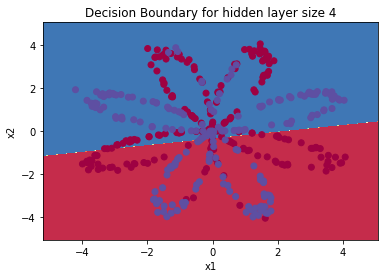

In [132]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, ephochs = 10000, learning_rate=1.2)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x.T,parameters), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [133]:
# Print accuracy
predictions = predict( X,parameters)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 49%


Cost after 0 itterations : 1.056344825297689
Cost after 1000 itterations : 0.6504701078337596
Cost after 2000 itterations : 0.6487754945479103
Cost after 3000 itterations : 0.6485131541513164
Cost after 4000 itterations : 0.6488054340005782
Accuracy for 1 hidden units: 58.5 %
Cost after 0 itterations : 0.8260437470137907
Cost after 1000 itterations : 0.6974401922265416
Cost after 2000 itterations : 0.6942712261703406
Cost after 3000 itterations : 0.6868975599873267
Cost after 4000 itterations : 0.6981384262608328
Accuracy for 2 hidden units: 59.5 %
Cost after 0 itterations : 0.6931688653164138
Cost after 1000 itterations : 0.6636192961980828
Cost after 2000 itterations : 0.6524199296629005
Cost after 3000 itterations : 0.6596230641972636
Cost after 4000 itterations : 0.6610223307986017
Accuracy for 3 hidden units: 57.49999999999999 %
Cost after 0 itterations : 0.6931497456249838
Cost after 1000 itterations : 0.686587228020428
Cost after 2000 itterations : 0.6850718298543795
Cost after 

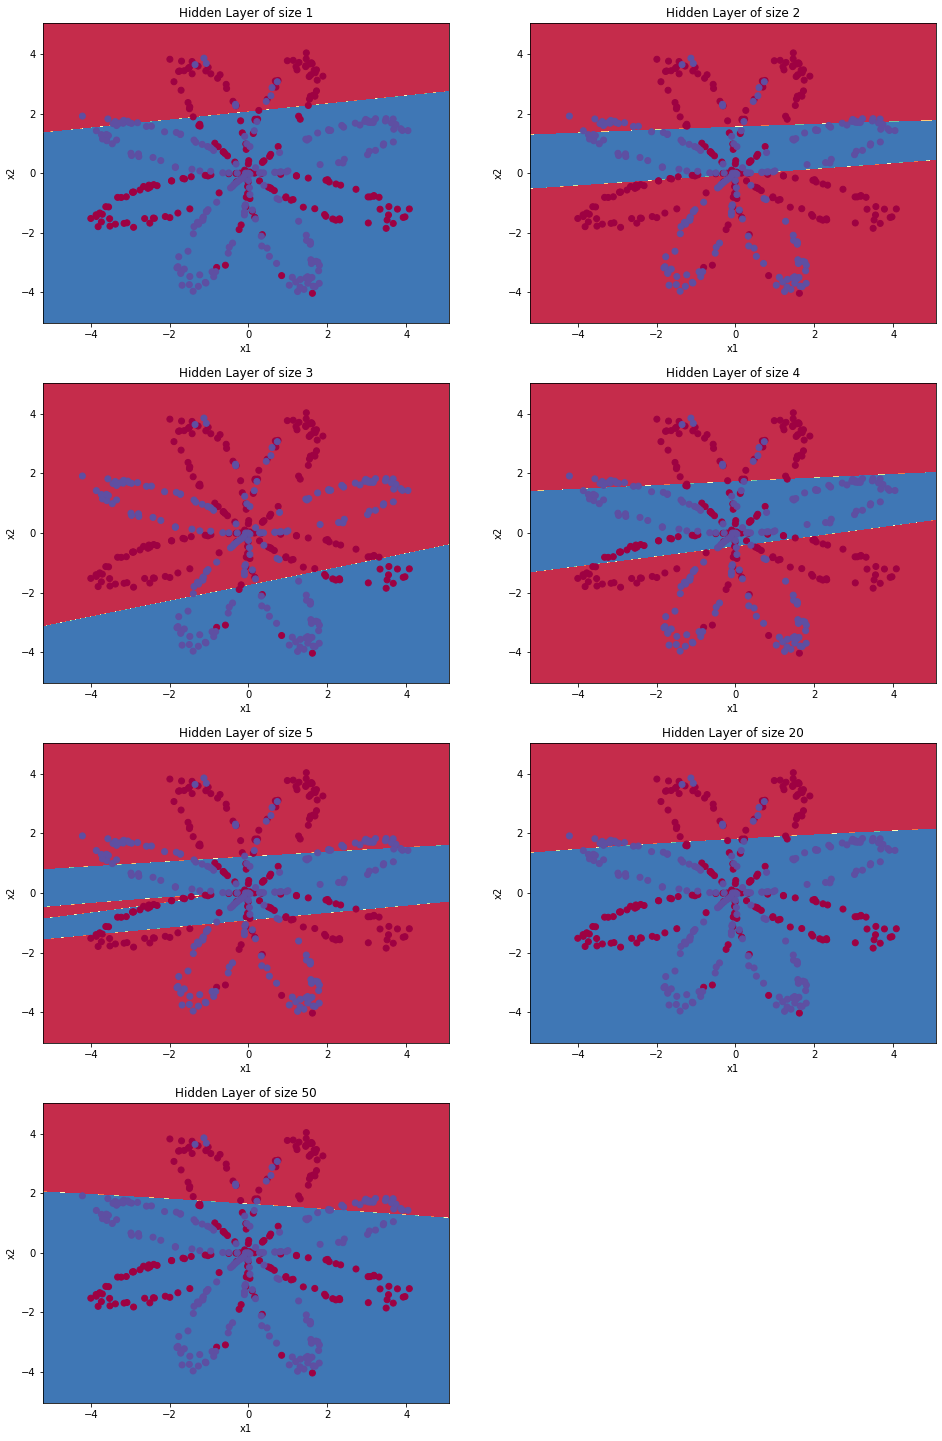

In [134]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, ephochs = 5000,learning_rate=1.2)
    plot_decision_boundary(lambda x: predict(x.T,parameters), X, Y)
    predictions = predict(X,parameters)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 